In [16]:
import json

In [17]:
from pandas import DataFrame, Series

In [18]:
import numpy as np

In [19]:
path = '../files/usagov_bitly_data2012-03-16-1331923249.txt'

In [20]:
records = [json.loads(line) for line in open(path)]

In [21]:
frame = DataFrame(records)

In [22]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [23]:
cframe = frame[frame.a.notnull()]

In [24]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

In [25]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [26]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [27]:
indexer = agg_counts.sum(1).argsort()

In [28]:
count_subset = agg_counts.take(indexer)[-10:]

<AxesSubplot:ylabel='tz'>

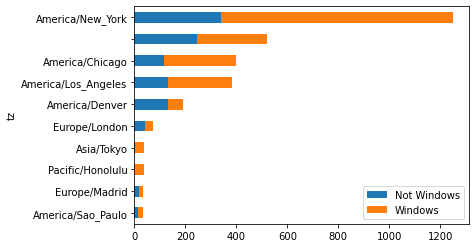

In [29]:
count_subset.plot(kind='barh', stacked=True)